In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [14]:
df = pd.read_csv("../out/generalization/8qwo3pja.csv")
df.head()

,simulation_idx,step_idx,mse,cardinality_target,cardinality_output,cardinality_truth,ospa_kmeans,scale
0,0,0,0.000122,10.995141,11.499794,11,388.860999,1
1,0,1,0.000125,11.958359,11.310198,12,378.074962,1
2,0,2,0.000118,10.786115,10.173974,11,391.741756,1
3,0,3,0.000112,9.902283,9.654655,10,398.278360,1
4,0,4,0.000113,10.786720,9.032056,11,380.916389,1


In [15]:
df.groupby("scale").mean()

,simulation_idx,step_idx,mse,cardinality_target,cardinality_output,cardinality_truth,ospa_kmeans
scale,,,,,,,
1,49.5,49.5,0.000119,9.756213,9.801055,9.8452,400.310104


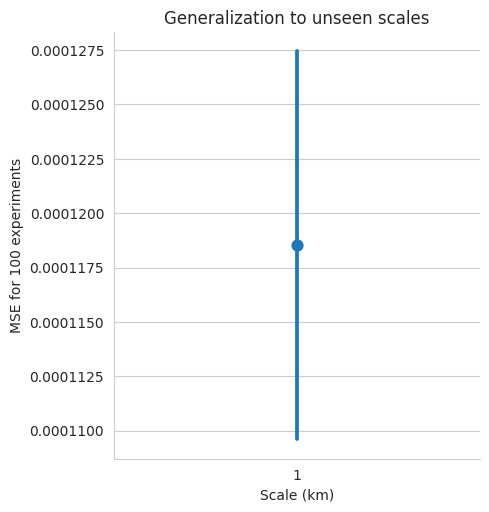

In [10]:
data = df.groupby(by=["scale", "simulation_idx"]).mean().drop(columns=["step_idx"]).reset_index()
sns.catplot(data=data, x="scale", y="mse", kind="point", errorbar=("sd", 1))
plt.ylabel("MSE for 100 experiments")
plt.xlabel("Scale (km)")
plt.title("Generalization to unseen scales")
plt.show()

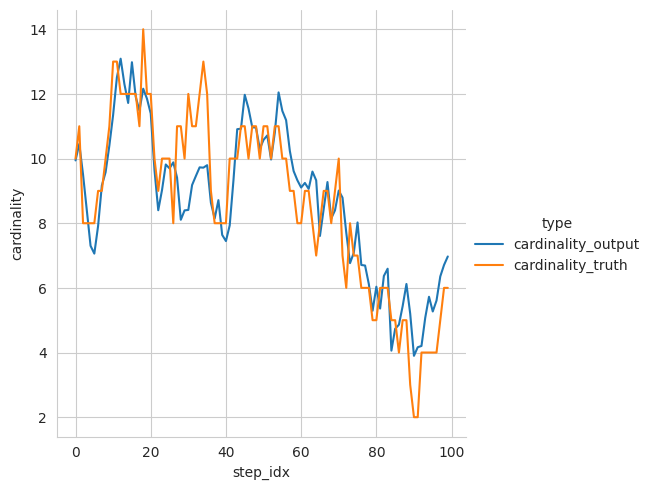

In [11]:
data = df.query("scale == 1 and simulation_idx == 30").melt(id_vars=["step_idx"], value_vars=["cardinality_output", "cardinality_truth"], var_name="type", value_name="cardinality")
sns.relplot(data=data, x="step_idx", y="cardinality", hue="type", kind="line")

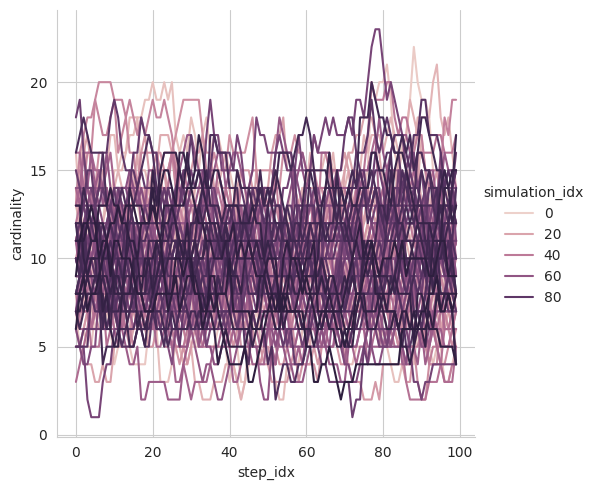

In [12]:
data = df.query("scale == 1").melt(id_vars=["step_idx", "simulation_idx"], value_vars=["cardinality_truth"], var_name="type", value_name="cardinality")
sns.relplot(data=data, x="step_idx", y="cardinality", hue="simulation_idx", kind="line")